<a href="https://colab.research.google.com/github/ancestor9/2025_Winter_Deep-Learning-with-TensorFlow/blob/main/Understanding_OLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OLS(Ordinary least squares) 배우기
## [Ordinary least squares](https://en.wikipedia.org/wiki/Ordinary_least_squares)
## [sklearn.linear_model](https://scikit-learn.org/stable/api/sklearn.linear_model.html)
### **Terminology to learn**

> 1. 상관관계(Correlation Analysis)
> 2. OLS : FInd the parameters to minimize MSE(Mean Squared Error)
>> - OLS의 결과를 해석할 수 있나?
> 3. 선형변환 (Linead Combination)
> 4. 다중 공선성(Multicollinearity)
> 5. VIF(분산 팽창 인수, Variance Inflation Factor)
> 6. 차원축소(Dimensionality Reduction)
>> - Can you apply Principal Component Analysis (PCA) for dimensionality reduction ?

## **1. 다중 회귀분석을 위한 가상데이터 생성**

In [1]:
from sklearn.datasets import make_regression

# 회귀 데이터 생성
X, y = make_regression(
    n_samples=500,      # 샘플 개수
    n_features=10,      # 전체 피처 개수
    n_informative=1,    # 타겟(y) 결정에 실제로 영향을 주는 유효 피처 개수
    noise=10.0,         # 데이터의 변동성 (노이즈가 클수록 예측이 어려움)
    random_state=1      # 결과 재현을 위한 난수 시드
)

print(f"X shape: {X.shape}") # (500, 20)
print(f"y shape: {y.shape}") # (500,)

X shape: (500, 10)
y shape: (500,)


## **2. EDA**

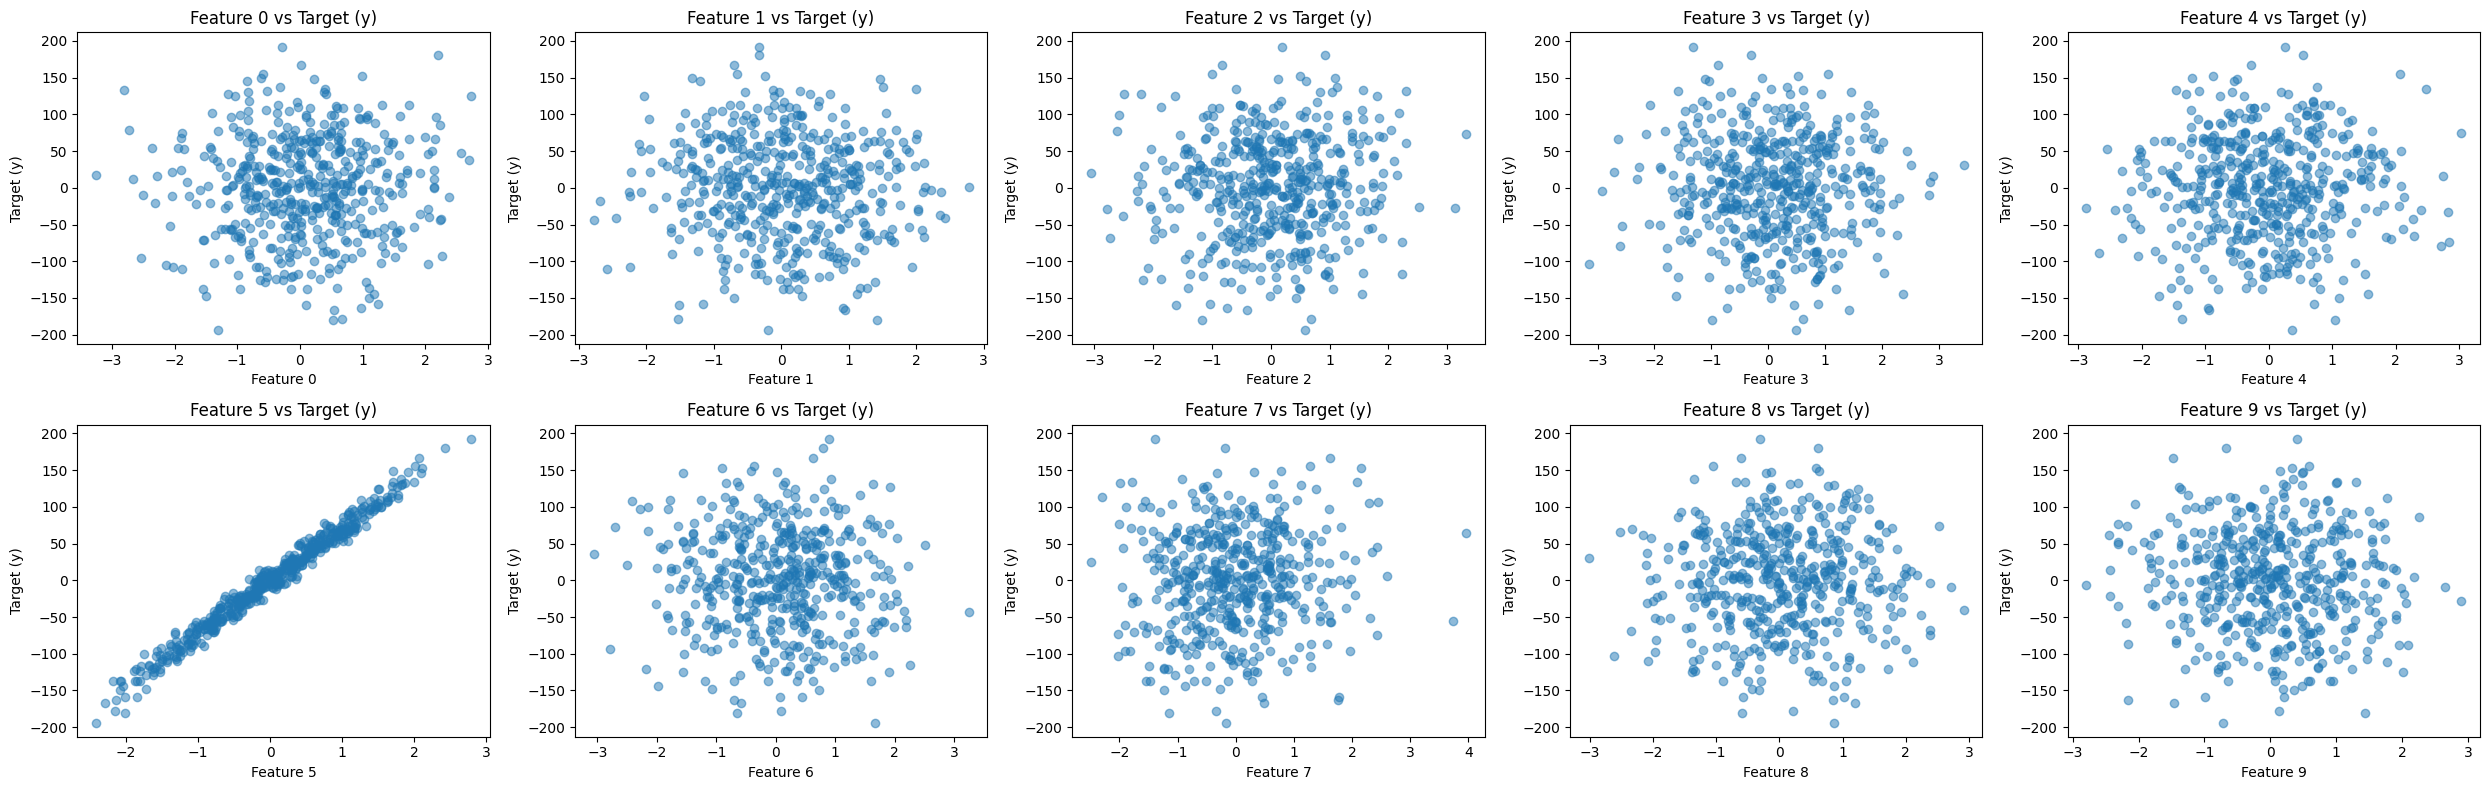

In [2]:
import matplotlib.pyplot as plt

n_features = X.shape[1]

# Calculate the number of rows and columns for the subplot grid
n_cols = 5  # You can adjust this for better visualization
n_rows = (n_features + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i in range(n_features):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.scatter(X[:, i], y, alpha=0.5)
    plt.title(f"Feature {i} vs Target (y)")
    plt.xlabel(f"Feature {i}")
    plt.ylabel("Target (y)")

plt.tight_layout()
plt.show()

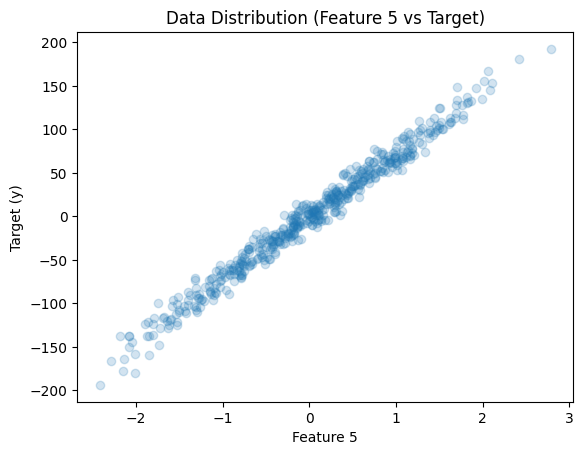

In [3]:
import matplotlib.pyplot as plt

# 6 번째 피처와 y값의 상관관계 산점도로 확인
plt.scatter(X[:, 5], y, alpha=0.2)
plt.title("Data Distribution (Feature 5 vs Target)")
plt.xlabel("Feature 5"); plt.ylabel("Target (y)")
plt.show()

## **3. 상관관계 분석**

In [4]:
import numpy as np
import pandas as pd

# X의 각 피처와 y 간의 상관관계 계산
correlations = []
for i in range(X.shape[1]):
    correlation = np.corrcoef(X[:, i], y)[0, 1]
    correlations.append((f"Feature {i}", correlation))

pd.DataFrame(correlations, columns=['Feature', 'Correlation']).sort_values(by='Correlation', ascending=False)

,Feature,Correlation
5,Feature 5,0.989867
7,Feature 7,0.057337
2,Feature 2,0.050789
4,Feature 4,0.030458
0,Feature 0,0.026587
8,Feature 8,-0.008513
3,Feature 3,-0.028495
1,Feature 1,-0.051615
6,Feature 6,-0.054596
9,Feature 9,-0.061572


## **4. 다중 회귀분석 : 통계 모듈**

In [5]:
import statsmodels.api as sm

# 상수항 추가 (OLS 모델에 절편을 포함시키기 위함)
X_with_const = sm.add_constant(X)

# OLS 모델 적합
model = sm.OLS(y, X_with_const)
results = model.fit()

# 결과 요약 출력
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     2407.
Date:                Fri, 16 Jan 2026   Prob (F-statistic):               0.00
Time:                        02:35:14   Log-Likelihood:                -1851.3
No. Observations:                 500   AIC:                             3725.
Df Residuals:                     489   BIC:                             3771.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1451      0.448     -0.324      0.7

## **5. 다중 회귀분석 : 머신러닝 모듈**

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 데이터를 학습 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# 선형 회귀 모델 생성 및 학습
model_sk = LinearRegression()
model_sk.fit(X_train, y_train)

print("\nScikit-learn Linear Regression Model trained successfully!")

X_train shape: (400, 10)
X_test shape: (100, 10)
y_train shape: (400,)
y_test shape: (100,)

Scikit-learn Linear Regression Model trained successfully!


In [7]:
from sklearn.metrics import mean_squared_error, r2_score

# 테스트 세트에 대한 예측 수행
y_pred = model_sk.predict(X_test)

# MSE 계산
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# R-squared 계산
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")

Mean Squared Error (MSE): 100.67
R-squared: 0.98


## **6. 선형관계가 있는 특성을 5개 추가**

In [8]:
import numpy as np

# Feature 5 (x6) is the informative feature based on previous analysis.
# Let's create 5 new variables linearly related to Feature 5 (X[:, 5])

x6_base = X[:, 5]

# Create 5 new features with linear relationships and some noise
new_features = np.zeros((X.shape[0], 5))

# Feature 1: x6_base * 2 + small noise
new_features[:, 0] = x6_base * 2
# Feature 2: x6_base * 0.5 - small noise
new_features[:, 1] = x6_base * 0.5 - np.random.normal(0, 0.3, X.shape[0])
# Feature 3: x6_base + constant + small noise
new_features[:, 2] = -x6_base + 10
# Feature 4: x6_base * 1.5 + small noise (different noise level)
new_features[:, 3] = x6_base * 1.5
# Feature 5: x6_base * -1 + small noise (negative correlation)
new_features[:, 4] = x6_base * -1 + np.random.normal(0, 0.4, X.shape[0])

# Concatenate the new features to the original X
X_extended = np.concatenate((X, new_features), axis=1)

print(f"Original X shape: {X.shape}")
print(f"New features shape: {new_features.shape}")
print(f"Extended X shape: {X_extended.shape}")

# Update X to X_extended for subsequent analysis
X = X_extended

Original X shape: (500, 10)
New features shape: (500, 5)
Extended X shape: (500, 15)


## **7. EDA again**

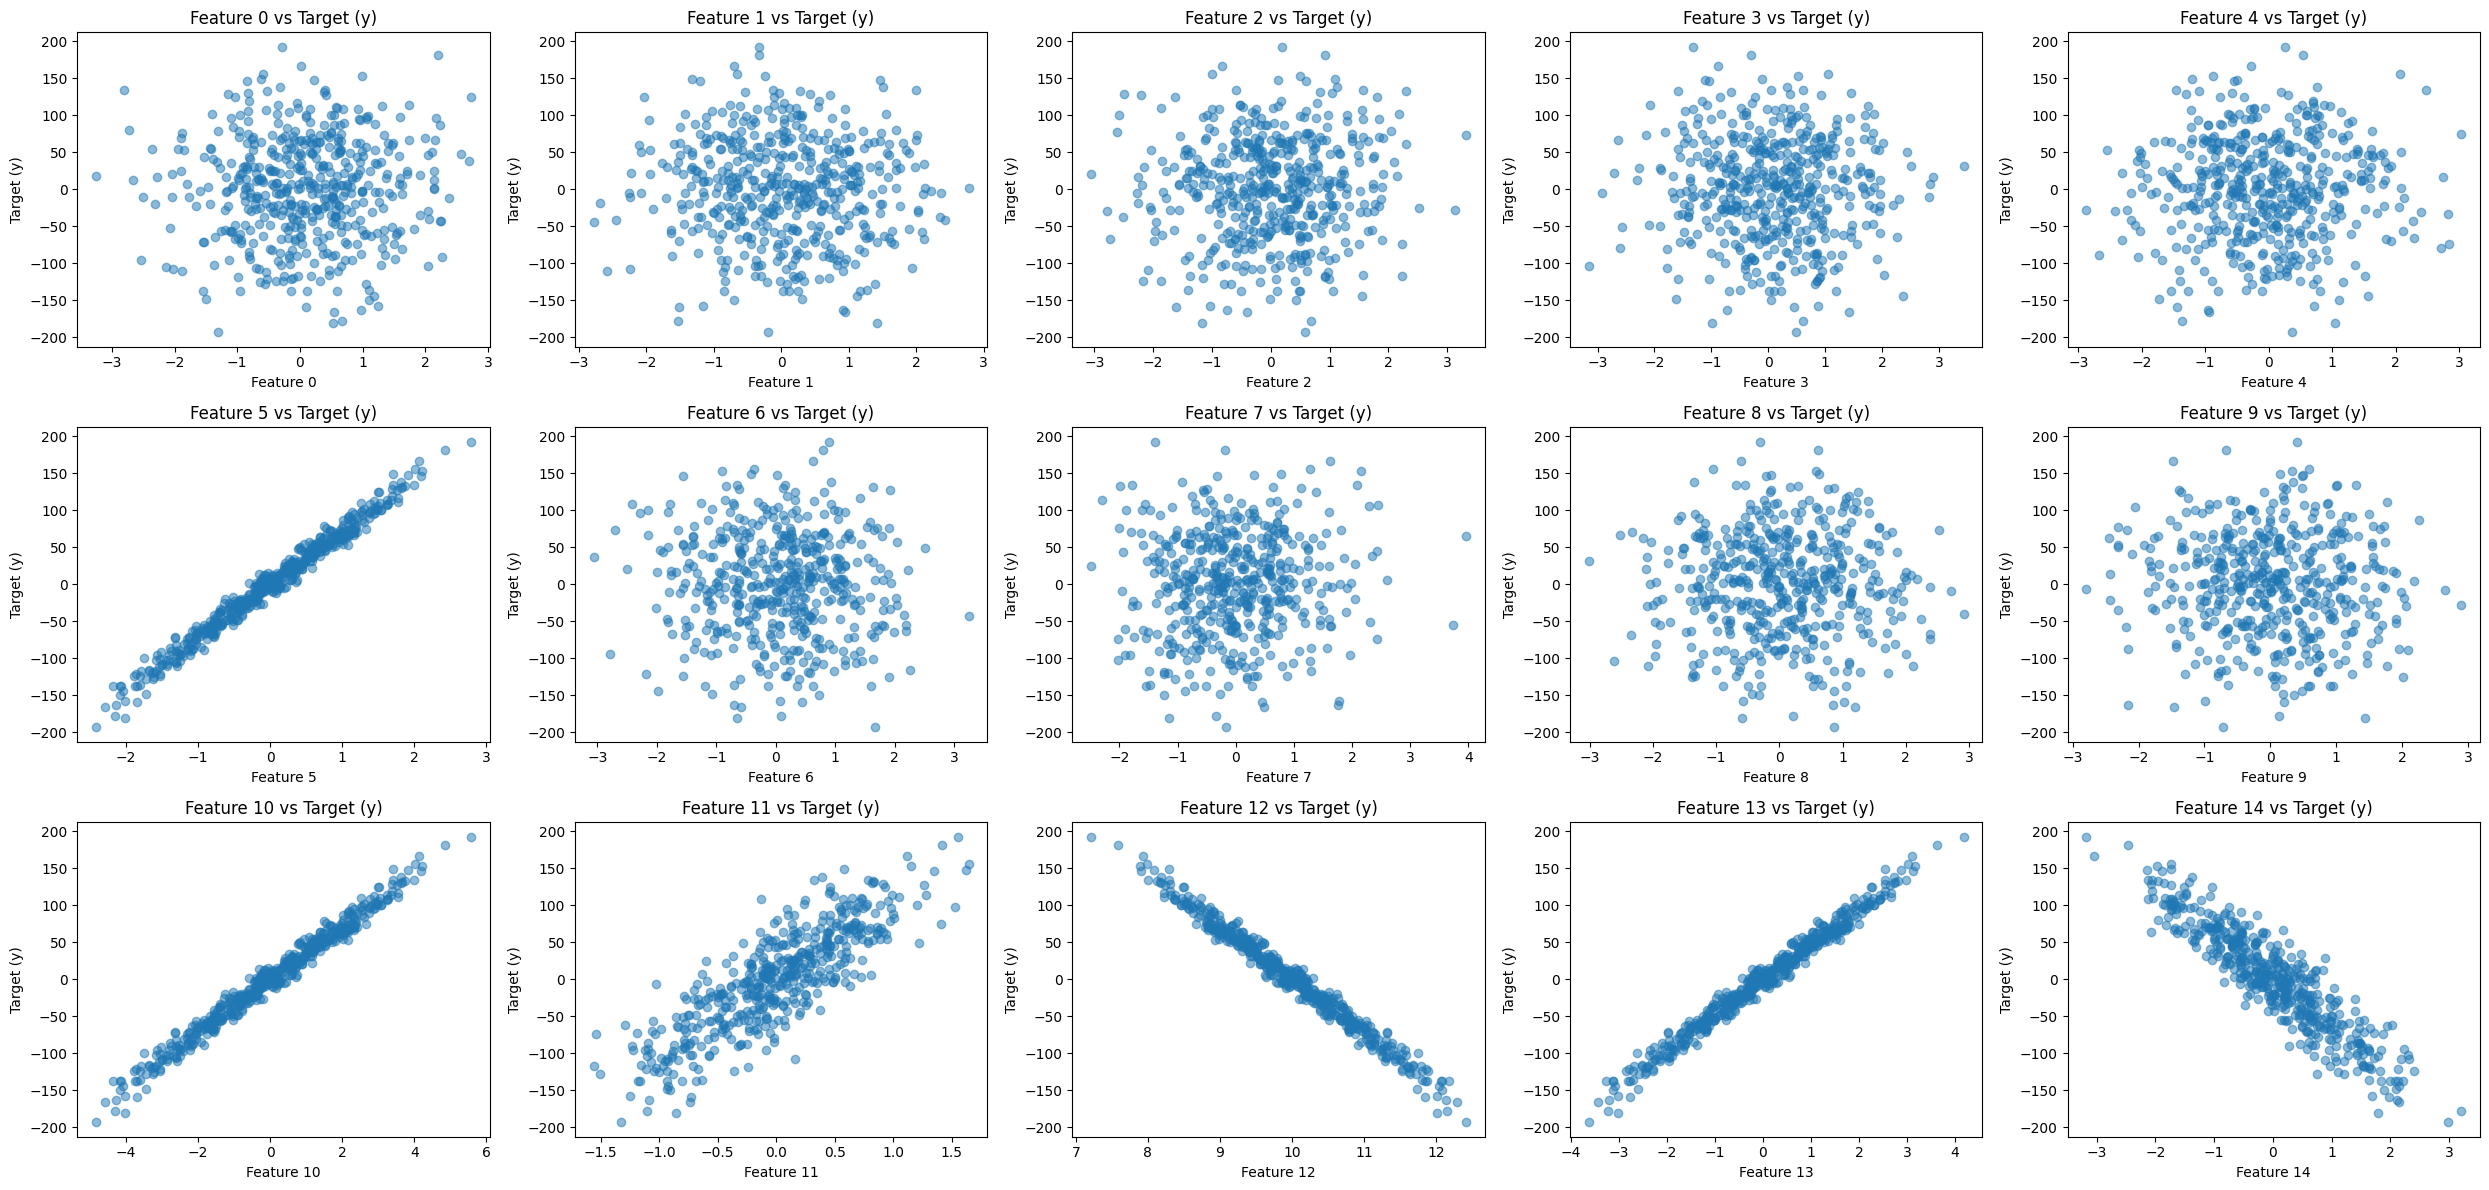

In [9]:
n_features = X.shape[1]

# Calculate the number of rows and columns for the subplot grid
n_cols = 5  # You can adjust this for better visualization
n_rows = (n_features + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i in range(n_features):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.scatter(X[:, i], y, alpha=0.5)
    plt.title(f"Feature {i} vs Target (y)")
    plt.xlabel(f"Feature {i}")
    plt.ylabel("Target (y)")

plt.tight_layout()
plt.show()

## **8. OLA again**

In [10]:
# 상수항 추가 (OLS 모델에 절편을 포함시키기 위함)
X_with_const = sm.add_constant(X)

# OLS 모델 적합
model = sm.OLS(y, X_with_const)
results = model.fit()

# 결과 요약 출력
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     2000.
Date:                Fri, 16 Jan 2026   Prob (F-statistic):               0.00
Time:                        02:35:23   Log-Likelihood:                -1851.0
No. Observations:                 500   AIC:                             3728.
Df Residuals:                     487   BIC:                             3783.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9623      0.020     46.994      0.0

## **8. VIF 분석**
- VIF(분산 팽창 인수, Variance Inflation Factor)는 회귀 분석에서 독립 변수들 간의 다중공선성(Multicollinearity) 수준을 측정하는 지표로, 변수 간 상관관계가 높을수록 VIF 값이 커져 계수 추정의 신뢰도가 떨어집니다.
- VIF 값이 1에 가까울수록 다중공선성이 낮고, 일반적으로 10 이상이면 심각한 문제가 있어 변수 제거를 고려하며, 5 이상은 주의가 필요합니다

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# VIF를 계산할 데이터프레임 생성 (상수항 포함)
X_vif = pd.DataFrame(X_with_const)

# 각 피처의 VIF 계산
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# 결과 출력 (상수항 제거)
print("Variance Inflation Factor (VIF):")
# 'const' 열은 VIF 계산에서 보통 제외하거나 따로 해석합니다.
# 여기서는 'const'는 제외하고 피처들만 출력합니다.
# 'const'는 OLS 모델에서 절편을 나타내며, 그 자체의 VIF는 다른 피처들과는 다른 의미를 가집니다.
# 일반적으로 VIF가 10을 초과하면 다중공선성이 심각하다고 판단합니다.
for index, row in vif_data.iterrows():
    if row['feature'] == 0: # OLS 모델의 상수항 (const)
        print(f"Constant: {row['VIF']:.2f} (This is the VIF for the intercept term and is often ignored)")
    else:
        print(f"Feature {int(row['feature']-1)}: {row['VIF']:.2f}")

Variance Inflation Factor (VIF):
Constant: 0.00 (This is the VIF for the intercept term and is often ignored)
Feature 0: 1.02
Feature 1: 1.04
Feature 2: 1.02
Feature 3: 1.05
Feature 4: 1.04
Feature 5: inf
Feature 6: 1.06
Feature 7: 1.03
Feature 8: 1.04
Feature 9: 1.02
Feature 10: inf
Feature 11: 3.63
Feature 12: inf
Feature 13: inf
Feature 14: 7.47


/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


## **9. 상관관계 again**
- 이 번에는 X 특성변수간 상과관계 EDA

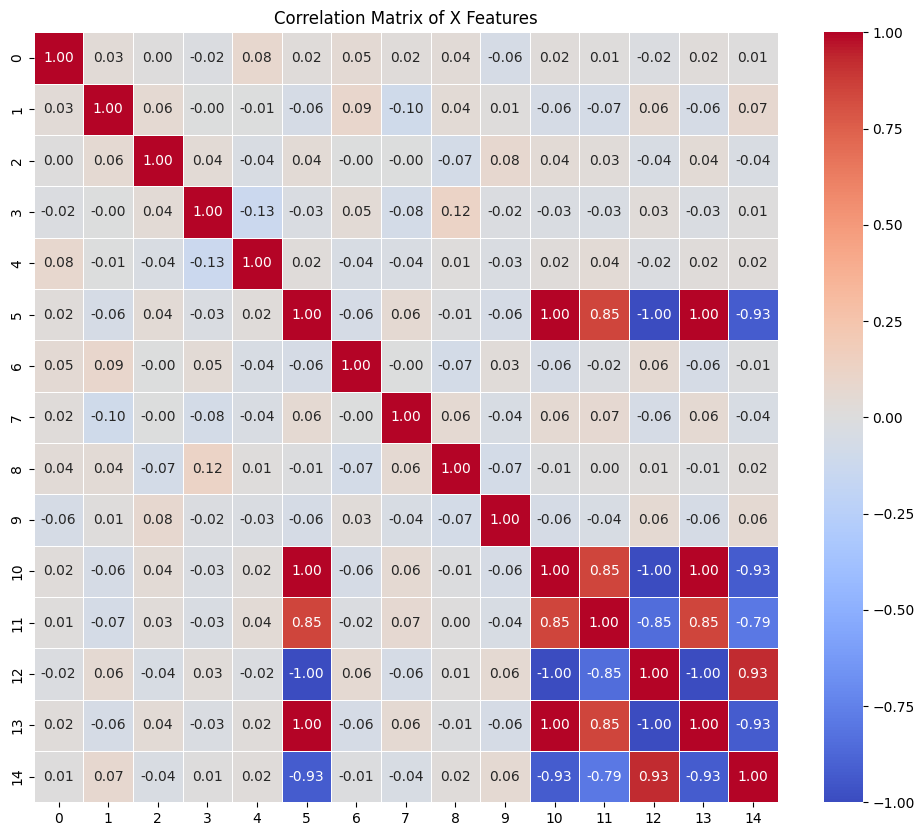

In [12]:

import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame from X for easier correlation calculation
X_df = pd.DataFrame(X)

# Calculate the correlation matrix for X
correlation_matrix_X = X_df.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_X, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of X Features')
plt.show()

## **10. 의미있는 특성변수만 추출하여 최종 분석하는 방법**
- 7.1. X의 특성변수의 선형관계, 상관관계가 높은 변수는 중복이라 제거
- 7.2. VIF가 높은 변수는 모두 제거
- 7.3. 선형관계를 가정하고 주성분분석으로 차원축소를 하여 회귀분석 수행

## **11. 주성분분석으로 차원축소를 하여 회귀분석 수행**
### **11.1. 차원축소하고 주성분 개수 결정하기**
- prompt : X 를 주성분분석으로 차원축소하고 주성분 개수별로 변동량을 시각화


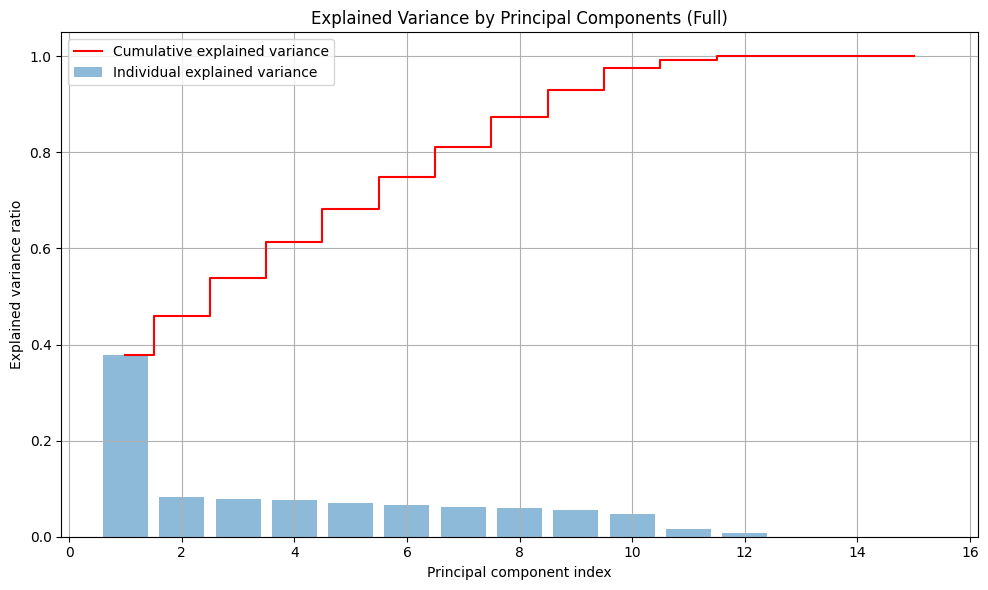

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# 1. 데이터 표준화 (PCA 전에 필수적)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# 2. PCA 결과 시각화 (기존 코드 재사용)
# For a fresh plot after specifying n_components if desired
pca_full = PCA()
pca_full.fit(X_scaled)
explained_variance_ratio_full = pca_full.explained_variance_ratio_
cumulative_explained_variance_full = np.cumsum(explained_variance_ratio_full)

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio_full) + 1), explained_variance_ratio_full, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_explained_variance_full) + 1), cumulative_explained_variance_full, where='mid', label='Cumulative explained variance', color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title('Explained Variance by Principal Components (Full)')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


### **11.2. 추출한 주성분으로 회귀분석 수행**
- 원자료와 주성분으로 각각 수행한 회귀분석과 평가하는 방법"
- 어떤 평가지표(Performance metric)로 비교하고 평가하여
- 어떤 예측모델을 선택할 것인가?

In [14]:

# 2. PCA 수행 및 주성분 선택
# We will choose n_components to explain ~95% of variance.
# From the cumulative explained variance, 13 components explain ~96%.
# Let's re-run PCA with n_components=13
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

print(f"Original X shape: {X.shape}")
print(f"Transformed X (PCA) shape: {X_pca.shape}")
print(f"Total explained variance with 13 components: {pca.explained_variance_ratio_.sum():.2f}")
X_pca.shape

Original X shape: (500, 15)
Transformed X (PCA) shape: (500, 10)
Total explained variance with 13 components: 0.98


(500, 10)

In [15]:
# 4. 데이터 분할
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

print(f"\nX_train_pca shape: {X_train_pca.shape}")
print(f"X_test_pca shape: {X_test_pca.shape}")

# 5. 선형 회귀 모델 학습
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train)

print("\nLinear Regression Model with PCA components trained successfully!")

# 6. 모델 평가
y_pred_pca = model_pca.predict(X_test_pca)
mse_pca = mean_squared_error(y_test, y_pred_pca)
r2_pca = r2_score(y_test, y_pred_pca)

print(f"Mean Squared Error (PCA model): {mse_pca:.2f}")
print(f"R-squared (PCA model): {r2_pca:.2f}")


X_train_pca shape: (400, 10)
X_test_pca shape: (100, 10)

Linear Regression Model with PCA components trained successfully!
Mean Squared Error (PCA model): 152.28
R-squared (PCA model): 0.97


## **12. 모델 선택과 평가(Model selection and evaluation)**
- [Model selection and evaluation](https://scikit-learn.org/stable/model_selection.html)
- [model_evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html)

In [16]:
from IPython.display import IFrame

# Scikit-learn 공식 문서를 600픽셀 높이로 출력
IFrame(src='https://scikit-learn.org/stable/', width= '100%', height= 500)

